In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\Data Analyst [projects]\Kaggle(Titanic dataset)\Titanic dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [18]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [20]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


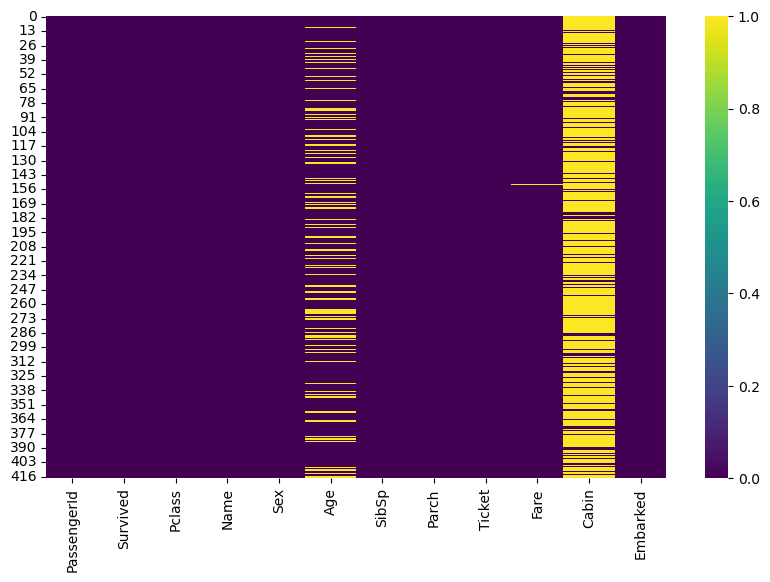

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [32]:
df.describe(include='O').T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [34]:
object_col=df.select_dtypes(include='object').columns
object_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [36]:
for col in object_col:
    print('--'*16)
    print(df[col].value_counts(dropna=False))
    print('--'*16)

--------------------------------
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: Name, Length: 418, dtype: int64
--------------------------------
--------------------------------
male      266
female    152
Name: Sex, dtype: int64
--------------------------------
--------------------------------
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64
--------------------------------
--------------------------------
NaN                327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
       

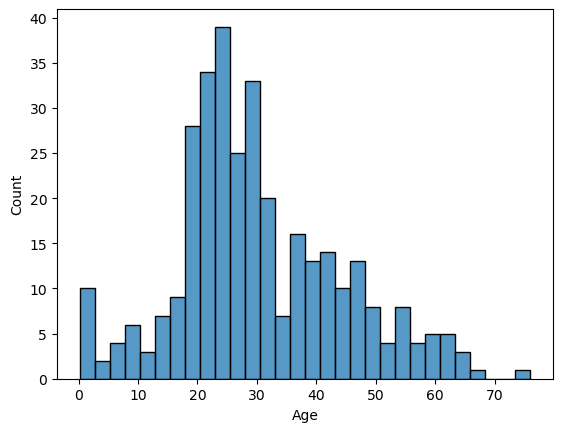

In [38]:
sns.histplot(data=df,x=df['Age'],kde=False,bins=30);

In [40]:
df.Age.mean()

30.272590361445783

In [42]:
df.Age.median()

27.0

<Axes: xlabel='Age'>

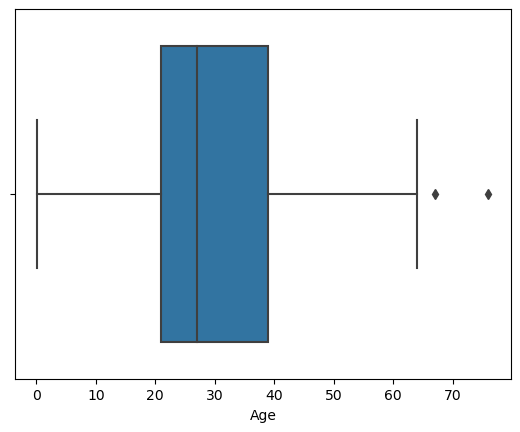

In [44]:
sns.boxplot(data=df,x='Age')

In [46]:
df.groupby('Pclass').Age.median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

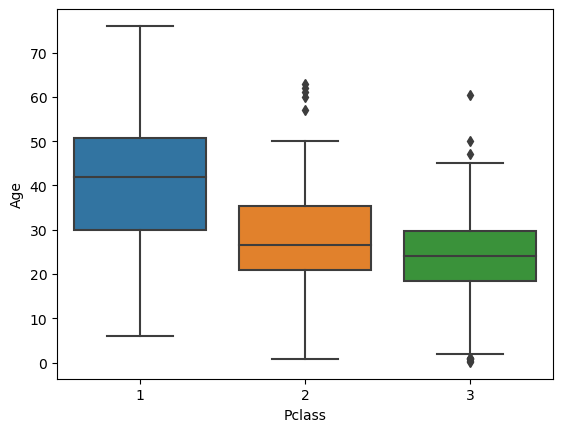

In [48]:
sns.boxplot(data=df,x='Pclass',y='Age');

In [50]:
df.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

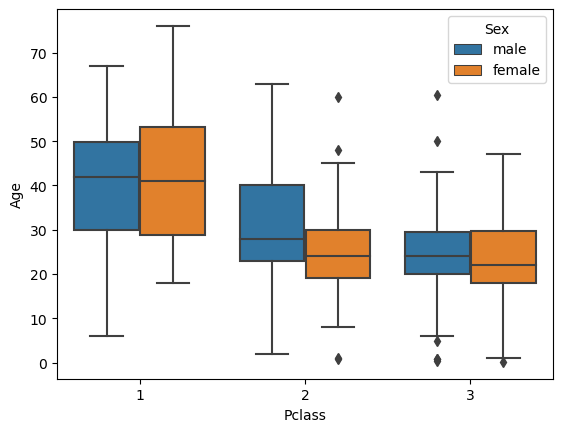

In [52]:
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex');

In [54]:
df.groupby(['Pclass','Sex']).Age.transform('median')

0      24.0
1      22.0
2      28.0
3      24.0
4      22.0
       ... 
413    24.0
414    41.0
415    24.0
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [57]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass','Sex']).Age.transform('median'))

In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [69]:
df.Survived.value_counts(normalize=True)

0    0.516484
1    0.483516
Name: Survived, dtype: float64

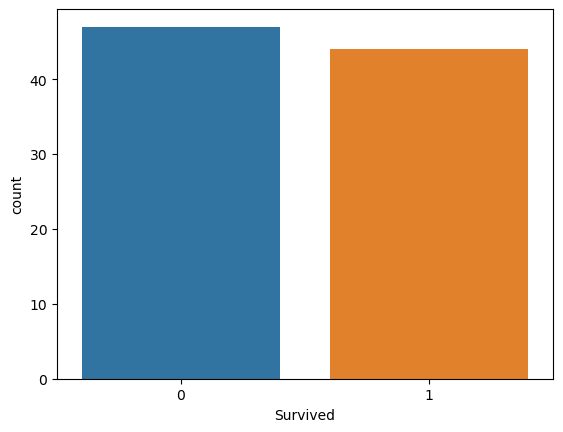

In [71]:
sns.countplot(data=df,x='Survived');

In [73]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           44
male    0           47
Name: Survived, dtype: int64

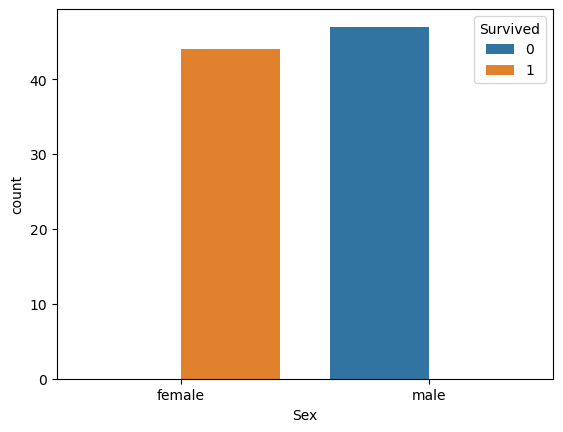

In [75]:
sns.countplot(data=df,x='Sex',hue='Survived');

In [77]:
df.groupby('Sex').Survived.value_counts(normalize=True)

Sex     Survived
female  1           1.0
male    0           1.0
Name: Survived, dtype: float64

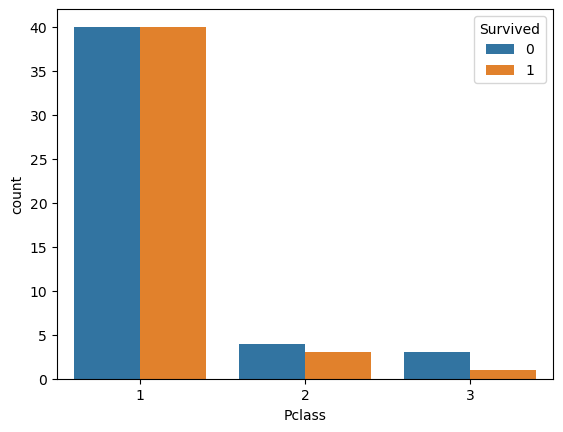

In [79]:
sns.countplot(data=df, x='Pclass', hue='Survived');

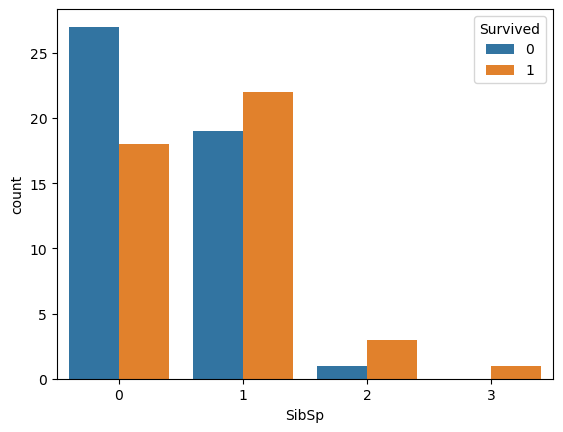

In [81]:
sns.countplot(data=df,x='SibSp',hue='Survived');

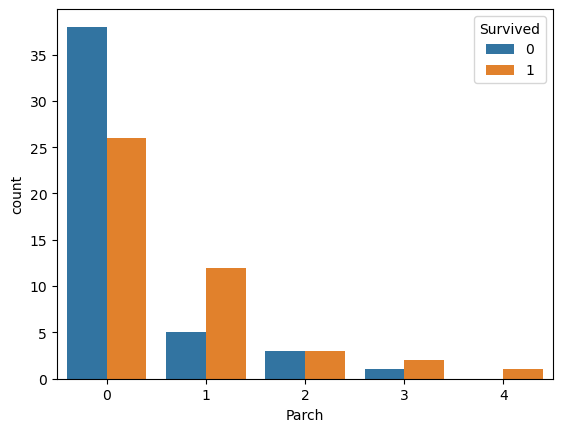

In [83]:
sns.countplot(data=df, x='Parch',hue='Survived');

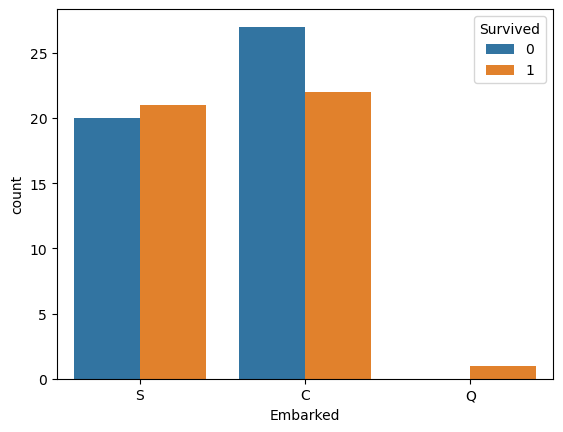

In [85]:
sns.countplot(data=df, x='Embarked',hue='Survived');

In [87]:
df.groupby('Survived').Age.median()

Survived
0    41.0
1    36.5
Name: Age, dtype: float64

In [89]:
df.groupby('Survived').Age.mean()

Survived
0    38.478723
1    39.590909
Name: Age, dtype: float64

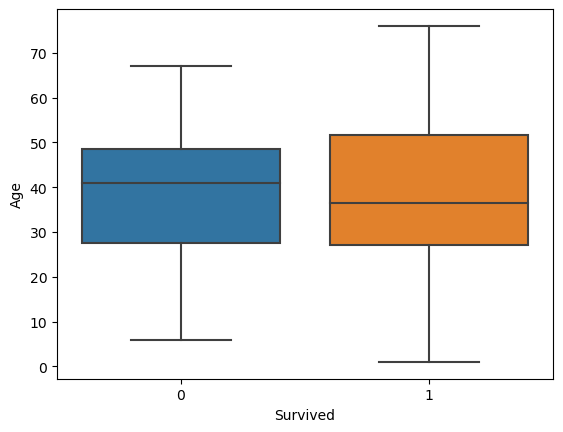

In [91]:
sns.boxplot(data=df,x='Survived',y='Age');

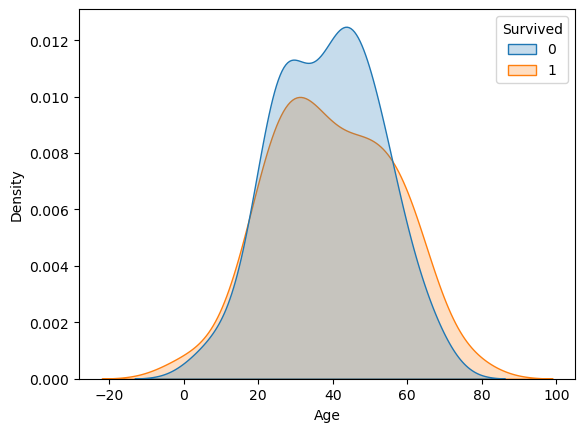

In [93]:
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True);

In [95]:
df.groupby('Survived').Fare.median()

Survived
0    51.8625
1    79.0250
Name: Fare, dtype: float64

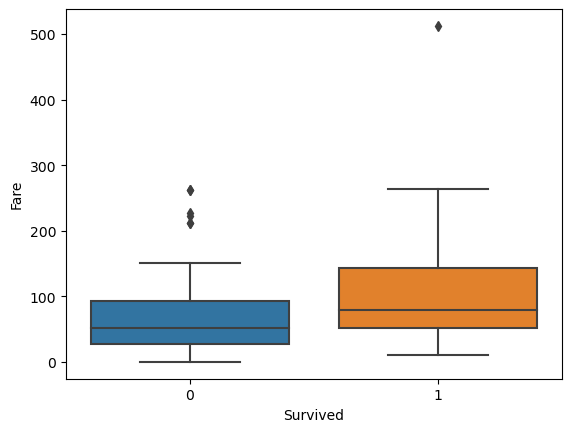

In [97]:
sns.boxplot(data=df, x='Survived',y='Fare');


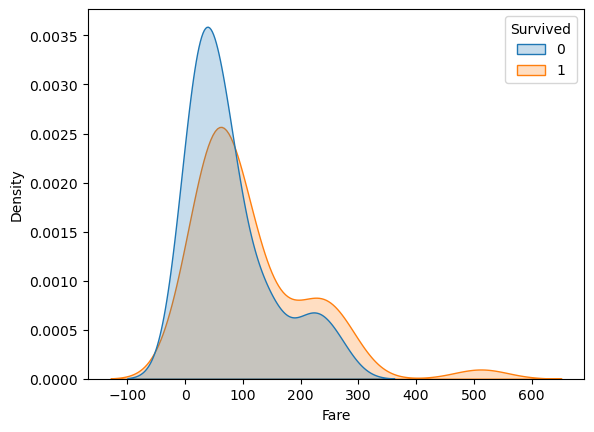

In [99]:
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True);

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [103]:
ticket = df.Ticket.value_counts(dropna=False)
ticket

113503         4
PC 17608       4
16966          3
PC 17483       3
21228          2
              ..
W.E.P. 5734    1
PC 17613       1
113038         1
W./C. 14266    1
PC 17758       1
Name: Ticket, Length: 70, dtype: int64

In [105]:
ticket[ticket!=1]

113503      4
PC 17608    4
16966       3
PC 17483    3
21228       2
13508       2
33638       2
PC 17756    2
230136      2
12749       2
13050       2
11778       2
19950       2
13695       2
13236       2
Name: Ticket, dtype: int64

In [107]:
group_list = list(ticket[ticket!=1].index)
group_list

['113503',
 'PC 17608',
 '16966',
 'PC 17483',
 '21228',
 '13508',
 '33638',
 'PC 17756',
 '230136',
 '12749',
 '13050',
 '11778',
 '19950',
 '13695',
 '13236']

In [109]:
True*1

1

In [111]:
False*1

0

In [113]:
df['is_group'] = df.Ticket.isin(group_list)*1
df['is_group']

12     1
14     0
24     1
26     0
28     0
      ..
404    0
405    0
407    1
411    0
414    0
Name: is_group, Length: 91, dtype: int32

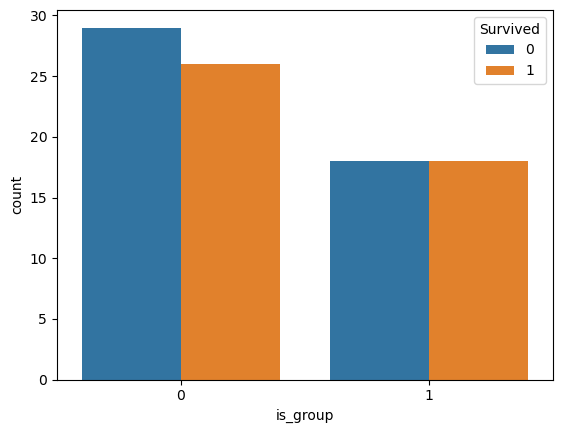

In [115]:
sns.countplot(data=df, x='is_group',hue='Survived');


In [117]:
df.SibSp

12     1
14     1
24     1
26     0
28     0
      ..
404    1
405    0
407    1
411    1
414    0
Name: SibSp, Length: 91, dtype: int64

In [119]:
df.Parch

12     0
14     0
24     3
26     1
28     0
      ..
404    0
405    0
407    1
411    0
414    0
Name: Parch, Length: 91, dtype: int64

In [121]:
df['is_alone'] =((df.SibSp == 0) & (df.Parch == 0))*1
df.is_alone

12     0
14     0
24     0
26     0
28     1
      ..
404    0
405    1
407    0
411    0
414    1
Name: is_alone, Length: 91, dtype: int32

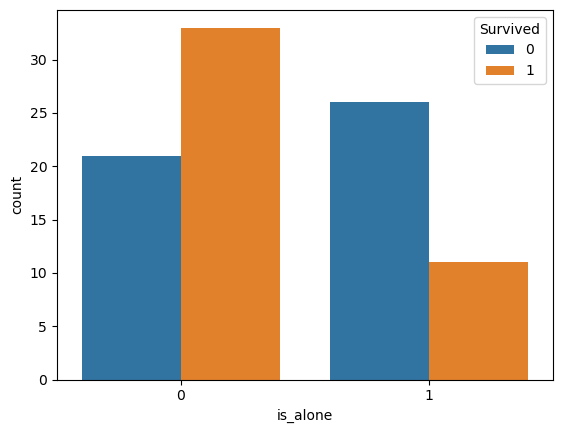

In [123]:
sns.countplot(data=df, x='is_alone',hue='Survived');

In [125]:
df.groupby('is_group').is_alone.value_counts()

is_group  is_alone
0         1           29
          0           26
1         0           28
          1            8
Name: is_alone, dtype: int64

In [127]:
df.Name

12         Snyder, Mrs. John Pillsbury (Nelle Stevenson)
14     Chaffee, Mrs. Herbert Fuller (Carrie Constance...
24       Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
26                          Ostby, Miss. Helene Ragnhild
28                               Brady, Mr. John Bertram
                             ...                        
404                         Frauenthal, Mr. Isaac Gerald
405         Nourney, Mr. Alfred (Baron von Drachstedt")"
407                           Widener, Mr. George Dunton
411      Minahan, Mrs. William Edward (Lillian E Thorpe)
414                         Oliva y Ocana, Dona. Fermina
Name: Name, Length: 91, dtype: object

In [129]:
df.Name.sample(10)

239          Douglas, Mrs. Walter Donald (Mahala Dutton)
112                             Evans, Miss. Edith Corse
331                         Dulles, Mr. William Crothers
222                           Cook, Mrs. (Selena Rogers)
343    Cardeza, Mrs. James Warburton Martinez (Charlo...
293                                Dodge, Dr. Washington
335                             Maguire, Mr. John Edward
59                           Chaudanson, Miss. Victorine
46                              Chevre, Mr. Paul Romaine
131                            Gracie, Col. Archibald IV
Name: Name, dtype: object

In [131]:
df.Name.str.split(',').str[1].str.split("(").str[0].str.split('"').str[0].str.split('.').str[1].str.strip()

12      John Pillsbury
14      Herbert Fuller
24       Arthur Larned
26     Helene Ragnhild
28        John Bertram
            ...       
404       Isaac Gerald
405             Alfred
407      George Dunton
411     William Edward
414            Fermina
Name: Name, Length: 91, dtype: object

In [133]:
df.Name.str.extract("\w+\.\s(\w*\s*\w*)" )

,0
12,John Pillsbury
14,Herbert Fuller
24,Arthur Larned
26,Helene Ragnhild
28,John Bertram
...,...
404,Isaac Gerald
405,Alfred
407,George Dunton
411,William Edward


In [135]:
df['Name'] =  df.Name.str.extract("\w+\.\s(\w*\s*\w*)" )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_group,is_alone
12,904,1,1,NaN,female,23.0,1,0,21228,82.2667,B45,S,1,0
14,906,1,1,NaN,female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,0,0
24,916,1,1,NaN,female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1,0
26,918,1,1,NaN,female,22.0,0,1,113509,61.9792,B36,C,0,0
28,920,0,1,NaN,male,41.0,0,0,113054,30.5000,A21,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,NaN,male,43.0,1,0,17765,27.7208,D40,C,0,0
405,1297,0,2,NaN,male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,0,1
407,1299,0,1,NaN,male,50.0,1,1,113503,211.5000,C80,C,1,0
411,1303,1,1,NaN,female,37.0,1,0,19928,90.0000,C78,Q,0,0


In [137]:
df.Ticket.str.extract("(\d*)$")

,0
12,21228
14,5734
24,17608
26,113509
28,113054
...,...
404,17765
405,2166
407,113503
411,19928


In [139]:
df["Ticket"] = df.Ticket.str.extract("(\d*)$")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_group,is_alone
12,904,1,1,NaN,female,23.0,1,0,21228,82.2667,B45,S,1,0
14,906,1,1,NaN,female,47.0,1,0,5734,61.1750,E31,S,0,0
24,916,1,1,NaN,female,48.0,1,3,17608,262.3750,B57 B59 B63 B66,C,1,0
26,918,1,1,NaN,female,22.0,0,1,113509,61.9792,B36,C,0,0
28,920,0,1,NaN,male,41.0,0,0,113054,30.5000,A21,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,NaN,male,43.0,1,0,17765,27.7208,D40,C,0,0
405,1297,0,2,NaN,male,20.0,0,0,2166,13.8625,D38,C,0,1
407,1299,0,1,NaN,male,50.0,1,1,113503,211.5000,C80,C,1,0
411,1303,1,1,NaN,female,37.0,1,0,19928,90.0000,C78,Q,0,0


In [141]:
df_final = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,is_group,is_alone
12,1,1,female,23.0,1,0,82.2667,B45,S,1,0
14,1,1,female,47.0,1,0,61.1750,E31,S,0,0
24,1,1,female,48.0,1,3,262.3750,B57 B59 B63 B66,C,1,0
26,1,1,female,22.0,0,1,61.9792,B36,C,0,0
28,0,1,male,41.0,0,0,30.5000,A21,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...
404,0,1,male,43.0,1,0,27.7208,D40,C,0,0
405,0,2,male,20.0,0,0,13.8625,D38,C,0,1
407,0,1,male,50.0,1,1,211.5000,C80,C,1,0
411,1,1,female,37.0,1,0,90.0000,C78,Q,0,0


C:\Users\nikhi\AppData\Local\Temp\ipykernel_12444\1323895288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True);


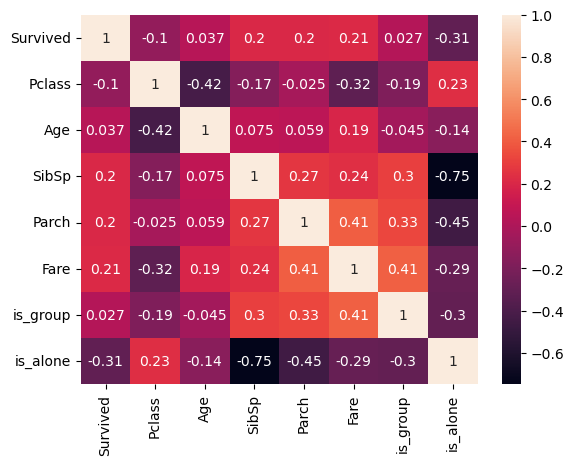

In [143]:
sns.heatmap(df_final.corr(), annot=True);

In [148]:
df_dummy = pd.get_dummies(data=df_final, drop_first=True)
df_dummy

,Survived,Pclass,Age,Fare,is_group,is_alone,Sex_male,Cabin_A18,Cabin_A21,Cabin_A29,...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
12,1,1,23.0,82.2667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,1,1,47.0,61.1750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,1,1,48.0,262.3750,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,1,1,22.0,61.9792,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,1,41.0,30.5000,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0,1,43.0,27.7208,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,0,2,20.0,13.8625,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407,0,1,50.0,211.5000,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
411,1,1,37.0,90.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
